In [1]:
from __future__ import division
import graphlab

In [2]:
products = graphlab.SFrame('amazon_baby_subset.gl/')

[INFO] This non-commercial license of GraphLab Create is assigned to srb1706@gmail.com and will expire on March 07, 2017. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-1194 - Server binary: /usr/local/lib/python2.7/dist-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1461083197.log
[INFO] GraphLab Server Version: 1.8


In [4]:
import json
with open('../important_words.json', 'r') as f: # Reads the list of most frequent words
    important_words = json.load(f)
important_words = [str(s) for s in important_words]


def remove_punctuation(text):
    import string
    return text.translate(None, string.punctuation) 

# Remove punctuation.
products['review_clean'] = products['review'].apply(remove_punctuation)

# Split out the words into individual columns
for word in important_words:
    products[word] = products['review_clean'].apply(lambda s : s.split().count(word))

In [6]:
products.head(5)

Columns:
	name	str
	review	str
	rating	float
	sentiment	int
	review_clean	str
	baby	int
	one	int
	great	int
	love	int
	use	int
	would	int
	like	int
	easy	int
	little	int
	seat	int
	old	int
	well	int
	get	int
	also	int
	really	int
	son	int
	time	int
	bought	int
	product	int
	good	int
	daughter	int
	much	int
	loves	int
	stroller	int
	put	int
	months	int
	car	int
	still	int
	back	int
	used	int
	recommend	int
	first	int
	even	int
	perfect	int
	nice	int
	bag	int
	two	int
	using	int
	got	int
	fit	int
	around	int
	diaper	int
	enough	int
	month	int
	price	int
	go	int
	could	int
	soft	int
	since	int
	buy	int
	room	int
	works	int
	made	int
	child	int
	keep	int
	size	int
	small	int
	need	int
	year	int
	big	int
	make	int
	take	int
	easily	int
	think	int
	crib	int
	clean	int
	way	int
	quality	int
	thing	int
	better	int
	without	int
	set	int
	new	int
	every	int
	cute	int
	best	int
	bottles	int
	work	int
	purchased	int
	right	int
	lot	int
	side	int
	happy	int
	comfortable	int
	toy	int
	able	int
	kids	int
	bit	int
	night	int
	long	int
	fits	int
	see	int
	us	int
	another	int
	play	int
	day	int
	money	int
	monitor	int
	tried	int
	thought	int
	never	int
	item	int
	hard	int
	plastic	int
	however	int
	disappointed	int
	reviews	int
	something	int
	going	int
	pump	int
	bottle	int
	cup	int
	waste	int
	return	int
	amazon	int
	different	int
	top	int
	want	int
	problem	int
	know	int
	water	int
	try	int
	received	int
	sure	int
	times	int
	chair	int
	find	int
	hold	int
	gate	int
	open	int
	bottom	int
	away	int
	actually	int
	cheap	int
	worked	int
	getting	int
	ordered	int
	came	int
	milk	int
	bad	int
	part	int
	worth	int
	found	int
	cover	int
	many	int
	design	int
	looking	int
	weeks	int
	say	int
	wanted	int
	look	int
	place	int
	purchase	int
	looks	int
	second	int
	piece	int
	box	int
	pretty	int
	trying	int
	difficult	int
	together	int
	though	int
	give	int
	started	int
	anything	int
	last	int
	company	int
	come	int
	returned	int
	maybe	int
	took	int
	broke	int
	makes	int
	stay	int
	instead	int
	idea	int
	head	int
	said	int
	less	int
	went	int
	working	int
	high	int
	unit	int
	seems	int
	picture	int
	completely	int
	wish	int
	buying	int
	babies	int
	won	int
	tub	int
	almost	int
	either	int

Rows: 5

Data:
+-------------------------------+-------------------------------+--------+-----------+
|              name             |             review            | rating | sentiment |
+-------------------------------+-------------------------------+--------+-----------+
| Stop Pacifier Sucking with... | All of my kids have cried ... |  5.0   |     1     |
| Nature's Lullabies Second ... | We wanted to get something... |  5.0   |     1     |
| Nature's Lullabies Second ... | My daughter had her 1st ba... |  5.0   |     1     |
|  Lamaze Peekaboo, I Love You  | One of baby's first and fa... |  4.0   |     1     |
| SoftPlay Peek-A-Boo Where'... | Very cute interactive book... |  5.0   |     1     |
+-------------------------------+-------------------------------+--------+-----------+
+-------------------------------+------+-----+-------+------+-----+-------+------+
|          review_clean         | baby | one | great | love | use | would | like |
+-------------------------------+------+-----+-------+------+-----+-------+------+
| All of my kids have cried ... |  0   |  0  |   1   |  0   |  0  |   0   |  0   |
| We wanted to get something... |  0   |  0  |   0   |  0   |  0  |   0   |  0   |
| My daughter had her 1st ba... |  1   |  0  |   0   |  0   |  0  |   0   |  0   |
| One of babys first and fav... |  0   |  0  |   0   |  0   |  0  |   0   |  1   |
| Very cute interactive book... |  0   |  0  |   1   |  0   |  0  |   0   |  0   |
+-------------------------------+------+-----+-------+------+-----+-------+------+
+------+--------+------+-----+------+-----+------+--------+-----+
| easy | little | seat | old | well | get | also | really | ... |
+------+--------+------+-----+------+-----+------+--------+-----+
|  1   |   0    |  0   |  0  |  0   |  0  |  0   |   0 

In [7]:
train_data, validation_data = products.random_split(.8, seed=2)

print 'Training set   : %d data points' % len(train_data)
print 'Validation set : %d data points' % len(validation_data)

Training set   : 42361 data points
Validation set : 10711 data points


In [8]:
import numpy as np

def get_numpy_data(data_sframe, features, label):
    data_sframe['intercept'] = 1
    features = ['intercept'] + features
    features_sframe = data_sframe[features]
    feature_matrix = features_sframe.to_numpy()
    label_sarray = data_sframe[label]
    label_array = label_sarray.to_numpy()
    return(feature_matrix, label_array)

In [9]:
arrays = np.load('../numpy-arrays/module-4-assignment-numpy-arrays.npz')
feature_matrix_train, sentiment_train = arrays['feature_matrix_train'], arrays['sentiment_train']
feature_matrix_valid, sentiment_valid = arrays['feature_matrix_valid'], arrays['sentiment_valid']

In [10]:
'''
produces probablistic estimate for P(y_i = +1 | x_i, w).
estimate ranges between 0 and 1.
'''
def predict_probability(feature_matrix, coefficients):
    # Take dot product of feature_matrix and coefficients  
    # YOUR CODE HERE
    featdotcoeff = np.dot(feature_matrix, coefficients)
    
    # Compute P(y_i = +1 | x_i, w) using the link function
    # YOUR CODE HERE
    predictions = 1/(1+np.exp(-featdotcoeff ))
    # return predictions
    return predictions

In [12]:
def feature_derivative_with_L2(errors, feature, coefficient, l2_penalty, feature_is_constant):    
    # Compute the dot product of errors and feature
    derivative = np.dot(errors, feature)
    # Return the derivative
    if not feature_is_constant:
        derivative = np.dot(errors, feature)-2*l2_penalty*coefficient
    return derivative

In [11]:
def compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    
    lp = np.sum((indicator-1)*scores - np.log(1. + np.exp(-scores))) - l2_penalty*np.sum(coefficients[1:]**2)
    
    return lp

In [13]:
def logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, l2_penalty, max_iter):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    for itr in xrange(max_iter):
        # Predict P(y_i = +1|x_i,w) using your predict_probability() function
        ## YOUR CODE HERE
        predictions = predict_probability(feature_matrix,coefficients)
        
        # Compute indicator value for (y_i = +1)
        indicator = (sentiment==+1)
        
        # Compute the errors as indicator - predictions
        errors = indicator - predictions
        for j in xrange(len(coefficients)): # loop over each coefficient
            is_intercept = (j == 0)
            # Recall that feature_matrix[:,j] is the feature column associated with coefficients[j].
            # Compute the derivative for coefficients[j]. Save it in a variable called derivative
            ## YOUR CODE HERE
            derivative = feature_derivative_with_L2(np.transpose(errors),feature_matrix[:,j],coefficients[j],l2_penalty,is_intercept)
            
            # add the step size times the derivative to the current coefficient
            ## YOUR CODE HERE
            coefficients[j]+=step_size*derivative
        
        # Checking whether log likelihood is increasing
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty)
            print 'iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp)
    return coefficients

In [21]:
# run with L2 = 0
coefficients_0_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                     initial_coefficients=np.zeros(194),
                                                     step_size=5e-6, l2_penalty=0, max_iter=501)

iteration   0: log likelihood of observed labels = -29179.39138303
iteration   1: log likelihood of observed labels = -29003.71259047
iteration   2: log likelihood of observed labels = -28834.66187288
iteration   3: log likelihood of observed labels = -28671.70781507
iteration   4: log likelihood of observed labels = -28514.43078198
iteration   5: log likelihood of observed labels = -28362.48344665
iteration   6: log likelihood of observed labels = -28215.56713122
iteration   7: log likelihood of observed labels = -28073.41743783
iteration   8: log likelihood of observed labels = -27935.79536396
iteration   9: log likelihood of observed labels = -27802.48168669
iteration  10: log likelihood of observed labels = -27673.27331484
iteration  11: log likelihood of observed labels = -27547.98083656
iteration  12: log likelihood of observed labels = -27426.42679977
iteration  13: log likelihood of observed labels = -27308.44444728
iteration  14: log likelihood of observed labels = -27193.8767

In [22]:
# run with L2 = 10
coefficients_10_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                      initial_coefficients=np.zeros(194),
                                                      step_size=5e-6, l2_penalty=10, max_iter=501)

iteration   0: log likelihood of observed labels = -29179.40062984
iteration   1: log likelihood of observed labels = -29003.76654163
iteration   2: log likelihood of observed labels = -28834.79322654
iteration   3: log likelihood of observed labels = -28671.94687528
iteration   4: log likelihood of observed labels = -28514.80571589
iteration   5: log likelihood of observed labels = -28363.02048078
iteration   6: log likelihood of observed labels = -28216.29071186
iteration   7: log likelihood of observed labels = -28074.35036891
iteration   8: log likelihood of observed labels = -27936.95892966
iteration   9: log likelihood of observed labels = -27803.89576265
iteration  10: log likelihood of observed labels = -27674.95647005
iteration  11: log likelihood of observed labels = -27549.95042714
iteration  12: log likelihood of observed labels = -27428.69905549
iteration  13: log likelihood of observed labels = -27311.03455140
iteration  14: log likelihood of observed labels = -27196.7989

In [23]:
# run with L2 = 1e2
coefficients_1e2_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                      initial_coefficients=np.zeros(194),
                                                      step_size=5e-6, l2_penalty=1e2, max_iter=501)

iteration   0: log likelihood of observed labels = -29179.48385119
iteration   1: log likelihood of observed labels = -29004.25177457
iteration   2: log likelihood of observed labels = -28835.97382190
iteration   3: log likelihood of observed labels = -28674.09410083
iteration   4: log likelihood of observed labels = -28518.17112932
iteration   5: log likelihood of observed labels = -28367.83774654
iteration   6: log likelihood of observed labels = -28222.77708940
iteration   7: log likelihood of observed labels = -28082.70799392
iteration   8: log likelihood of observed labels = -27947.37595368
iteration   9: log likelihood of observed labels = -27816.54738615
iteration  10: log likelihood of observed labels = -27690.00588850
iteration  11: log likelihood of observed labels = -27567.54970126
iteration  12: log likelihood of observed labels = -27448.98991327
iteration  13: log likelihood of observed labels = -27334.14912742
iteration  14: log likelihood of observed labels = -27222.8604

In [24]:
# run with L2 = 1e3
coefficients_1e3_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                      initial_coefficients=np.zeros(194),
                                                      step_size=5e-6, l2_penalty=1e3, max_iter=501)

iteration   0: log likelihood of observed labels = -29180.31606471
iteration   1: log likelihood of observed labels = -29009.07176112
iteration   2: log likelihood of observed labels = -28847.62378912
iteration   3: log likelihood of observed labels = -28695.14439397
iteration   4: log likelihood of observed labels = -28550.95060743
iteration   5: log likelihood of observed labels = -28414.45771129
iteration   6: log likelihood of observed labels = -28285.15124375
iteration   7: log likelihood of observed labels = -28162.56976044
iteration   8: log likelihood of observed labels = -28046.29387744
iteration   9: log likelihood of observed labels = -27935.93902900
iteration  10: log likelihood of observed labels = -27831.15045502
iteration  11: log likelihood of observed labels = -27731.59955260
iteration  12: log likelihood of observed labels = -27636.98108219
iteration  13: log likelihood of observed labels = -27547.01092670
iteration  14: log likelihood of observed labels = -27461.4242

In [25]:
# run with L2 = 1e5
coefficients_1e5_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                      initial_coefficients=np.zeros(194),
                                                      step_size=5e-6, l2_penalty=1e5, max_iter=501)

iteration   0: log likelihood of observed labels = -29271.85955115
iteration   1: log likelihood of observed labels = -29271.71006589
iteration   2: log likelihood of observed labels = -29271.65738833
iteration   3: log likelihood of observed labels = -29271.61189923
iteration   4: log likelihood of observed labels = -29271.57079975
iteration   5: log likelihood of observed labels = -29271.53358505
iteration   6: log likelihood of observed labels = -29271.49988440
iteration   7: log likelihood of observed labels = -29271.46936584
iteration   8: log likelihood of observed labels = -29271.44172890
iteration   9: log likelihood of observed labels = -29271.41670149
iteration  10: log likelihood of observed labels = -29271.39403722
iteration  11: log likelihood of observed labels = -29271.37351294
iteration  12: log likelihood of observed labels = -29271.35492661
iteration  13: log likelihood of observed labels = -29271.33809523
iteration  14: log likelihood of observed labels = -29271.3228

In [26]:
table = graphlab.SFrame({'word': ['(intercept)'] + important_words})
def add_coefficients_to_table(coefficients, column_name):
    table[column_name] = coefficients
    return table

In [27]:
add_coefficients_to_table(coefficients_0_penalty, 'coefficients [L2=0]')
add_coefficients_to_table(coefficients_4_penalty, 'coefficients [L2=4]')
add_coefficients_to_table(coefficients_10_penalty, 'coefficients [L2=10]')
add_coefficients_to_table(coefficients_1e2_penalty, 'coefficients [L2=1e2]')
add_coefficients_to_table(coefficients_1e3_penalty, 'coefficients [L2=1e3]')
add_coefficients_to_table(coefficients_1e5_penalty, 'coefficients [L2=1e5]')

word,coefficients [L2=0],coefficients [L2=4],coefficients [L2=10],coefficients [L2=1e2]
(intercept),-0.0637421352275,0.0113617511844,-0.06225594377,-0.0504383651953
baby,0.0740730059216,0.0017841492163,0.0738773534804,0.0723603602218
one,0.0127525057784,-0.00182685568023,0.0121152529534,0.0072472833187
great,0.801624989778,0.00894956049736,0.789935147221,0.701425073675
love,1.05855398207,0.0090417372977,1.03952851585,0.896644133101
use,-0.000104152191248,0.000417863934616,0.000555710975755,0.00548103267946
would,-0.287021443534,-0.008127027099,-0.284564035562,-0.265992746226
like,-0.00338447399293,-0.000826650270031,-0.00352729444966,-0.00463499283253
easy,0.984558819873,0.0088076812121,0.967361836631,0.838244832955
little,0.524419456364,0.00594051364038,0.516917392491,0.460234577902


In [38]:
table.sort('coefficients [L2=0]',ascending=False)

word,coefficients [L2=0],coefficients [L2=4],coefficients [L2=10],coefficients [L2=1e2],coefficients [L2=1e3]
love,1.05855398207,0.0090417372977,1.03952851585,0.896644133101,0.418353644134
loves,1.0524840478,0.00614988255574,1.03126534689,0.870793974823,0.345870256629
easy,0.984558819873,0.0088076812121,0.967361836631,0.838244832955,0.401903971363
perfect,0.835693207638,0.00398880259473,0.818037837543,0.684142944984,0.250613842662
great,0.801624989778,0.00894956049736,0.789935147221,0.701425073675,0.376011714222
happy,0.557395202363,0.00215910145908,0.545245445087,0.452800035816,0.15408740166
best,0.535033889772,0.00197367978824,0.52323599624,0.43352640354,0.145590597417
little,0.524419456364,0.00594051364038,0.516917392491,0.460234577902,0.251220653959
fits,0.487652253265,0.00230871824918,0.47720459132,0.397765496018,0.141241335716
well,0.453866486768,0.00394450214798,0.446700473966,0.392304121556,0.194926430271


In [39]:
negative_words = ['disappointed','money','return','waste','returned']
positive_words = ['love','loves','easy','perfect','great']

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    table_positive_words = table.filter_by(column_name='word', values=positive_words)
    table_negative_words = table.filter_by(column_name='word', values=negative_words)
    del table_positive_words['word']
    del table_negative_words['word']
    
    for i in xrange(len(positive_words)):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, table_positive_words[i:i+1].to_numpy().flatten(),
                 '-', label=positive_words[i], linewidth=4.0, color=color)
        
    for i in xrange(len(negative_words)):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, table_negative_words[i:i+1].to_numpy().flatten(),
                 '-', label=negative_words[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
    plt.axis([1, 1e5, -1, 2])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()

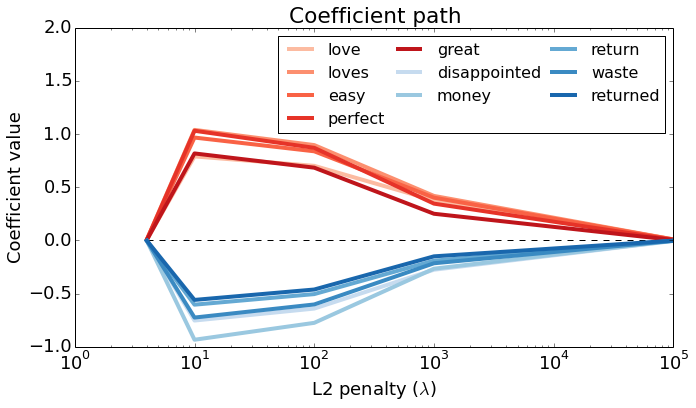

In [41]:
make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list=[0, 4, 10, 1e2, 1e3, 1e5])

In [42]:
def get_classification_accuracy(feature_matrix, sentiment, coefficients):
    scores = np.dot(feature_matrix, coefficients)
    apply_threshold = np.vectorize(lambda x: 1. if x > 0  else -1.)
    predictions = apply_threshold(scores)
    
    num_correct = (predictions == sentiment).sum()
    accuracy = num_correct / len(feature_matrix)    
    return accuracy

In [43]:
train_accuracy = {}
train_accuracy[0]   = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_0_penalty)
train_accuracy[4]   = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_4_penalty)
train_accuracy[10]  = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_10_penalty)
train_accuracy[1e2] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_1e2_penalty)
train_accuracy[1e3] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_1e3_penalty)
train_accuracy[1e5] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_1e5_penalty)

validation_accuracy = {}
validation_accuracy[0]   = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_0_penalty)
validation_accuracy[4]   = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_4_penalty)
validation_accuracy[10]  = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_10_penalty)
validation_accuracy[1e2] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_1e2_penalty)
validation_accuracy[1e3] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_1e3_penalty)
validation_accuracy[1e5] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_1e5_penalty)

In [44]:
# Build a simple report
for key in sorted(validation_accuracy.keys()):
    print "L2 penalty = %g" % key
    print "train accuracy = %s, validation_accuracy = %s" % (train_accuracy[key], validation_accuracy[key])
    print "--------------------------------------------------------------------------------"

L2 penalty = 0
train accuracy = 0.785156157787, validation_accuracy = 0.78143964149
--------------------------------------------------------------------------------
L2 penalty = 4
train accuracy = 0.680366374731, validation_accuracy = 0.667818130893
--------------------------------------------------------------------------------
L2 penalty = 10
train accuracy = 0.784990911452, validation_accuracy = 0.781719727383
--------------------------------------------------------------------------------
L2 penalty = 100
train accuracy = 0.783975826822, validation_accuracy = 0.781066193633
--------------------------------------------------------------------------------
L2 penalty = 1000
train accuracy = 0.775855149784, validation_accuracy = 0.771356549342
--------------------------------------------------------------------------------
L2 penalty = 100000
train accuracy = 0.680366374731, validation_accuracy = 0.667818130893
---------------------------------------------------------------------------